In [14]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader,TensorDataset

In [15]:
import seaborn as sns
iris = sns.load_dataset('iris')

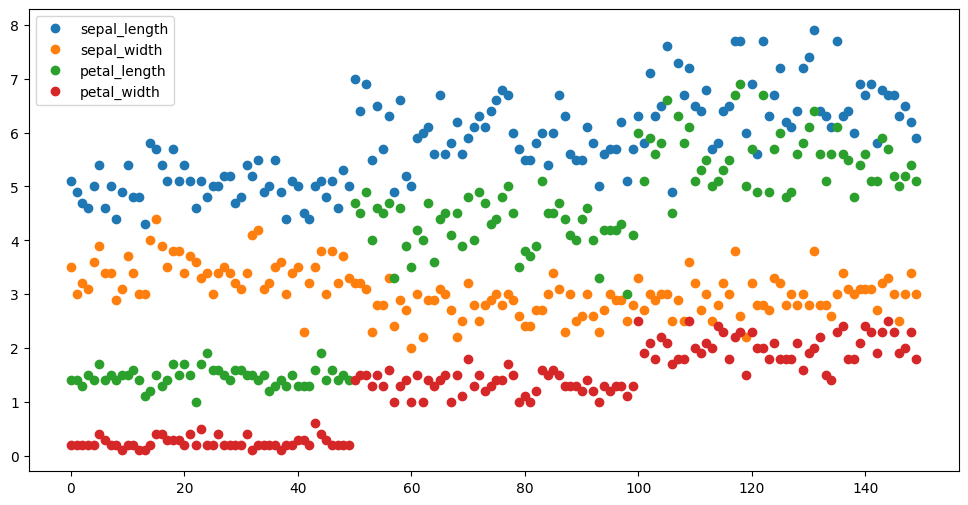

In [16]:
iris.plot(marker='o', linestyle='none', figsize=(12,6))
plt.show()

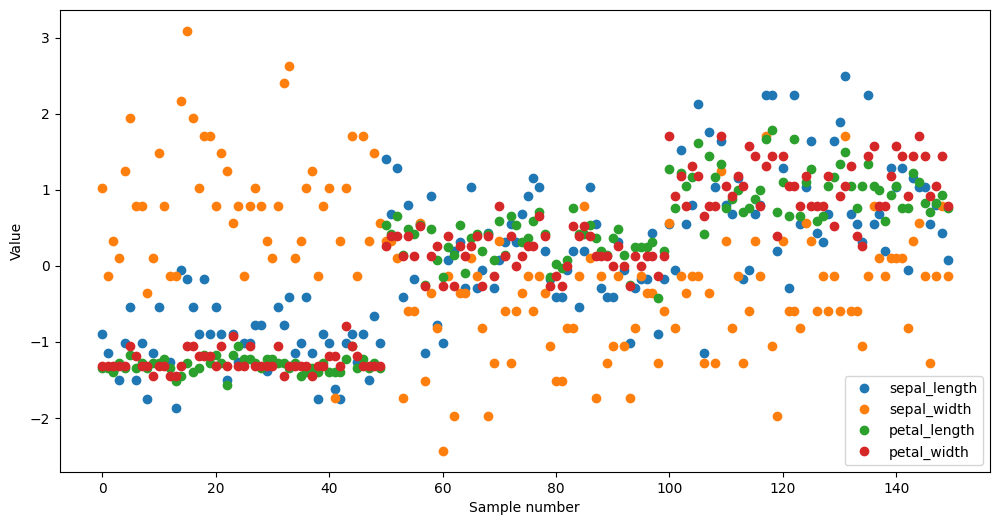

In [17]:
import scipy.stats as stats
cols2zscore = iris.keys()
cols2zscore = cols2zscore.drop('species')
iris[cols2zscore] = iris[cols2zscore].apply(stats.zscore)
iris.plot(marker='o',linestyle='none',figsize=(12,6))
plt.xlabel('Sample number')
plt.ylabel('Value')
plt.show()

In [18]:
data = torch.tensor(iris[iris.columns[0:4]].values).float()

labels = torch.zeros(len(data), dtype=torch.long)
labels[iris.species=='versicolor'] = 1
labels[iris.species=='virginica'] = 2

In [19]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=.2)

train_data = TensorDataset(train_data, train_labels)
test_data = TensorDataset(test_data, test_labels)

batchSize = 16
train_loader = DataLoader(train_data, batch_size=batchSize, shuffle=True, drop_last=True)
test_loader = DataLoader(test_data, batch_size=test_data.tensors[0].shape[0])

In [20]:
for X,y in train_loader:
    print(X.shape, y.shape)

torch.Size([16, 4]) torch.Size([16])
torch.Size([16, 4]) torch.Size([16])
torch.Size([16, 4]) torch.Size([16])
torch.Size([16, 4]) torch.Size([16])
torch.Size([16, 4]) torch.Size([16])
torch.Size([16, 4]) torch.Size([16])
torch.Size([16, 4]) torch.Size([16])


In [21]:
for X,y in train_loader:
    print(X.shape, y.shape)

torch.Size([16, 4]) torch.Size([16])
torch.Size([16, 4]) torch.Size([16])
torch.Size([16, 4]) torch.Size([16])
torch.Size([16, 4]) torch.Size([16])
torch.Size([16, 4]) torch.Size([16])
torch.Size([16, 4]) torch.Size([16])
torch.Size([16, 4]) torch.Size([16])


In [22]:
def createANNmodel():
    ANN = nn.Sequential(
        nn.Linear(4,64),
        nn.ReLU(),
        nn.Linear(64,64),
        nn.ReLU(),
        nn.Linear(64,3),
    )

    lossfun = nn.CrossEntropyLoss()

    optimizer = torch.optim.SGD(params=ANN.parameters(), lr=0.0005)
    
    return ANN, lossfun, optimizer

In [23]:
numEpochs = 1000

def trainTheModel():
    trainAcc = []
    testAcc = []
    losses = []

    for epochi in range(numEpochs):
        batchAcc = []
        batchLoss = []
        for X,y in train_loader:
            yHat = ANN(X)

            loss = lossfun(yHat, y)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            batchAcc.append(100*torch.mean((torch.argmax(yHat,axis=1)==y).float()).item())
            batchLoss.append(loss.item())

        trainAcc.append(np.mean(batchAcc))
        losses.append(np.mean(batchLoss))

        X,y = next(iter(test_loader))
        predlabels = torch.argmax(ANN(X), axis=1)
        testAcc.append(torch.mean((predlabels==y).float()).item())

    return trainAcc, testAcc, losses

In [24]:
ANN, lossfun, optimizer = createANNmodel()

trainAcc, testAcc, losses = trainTheModel()

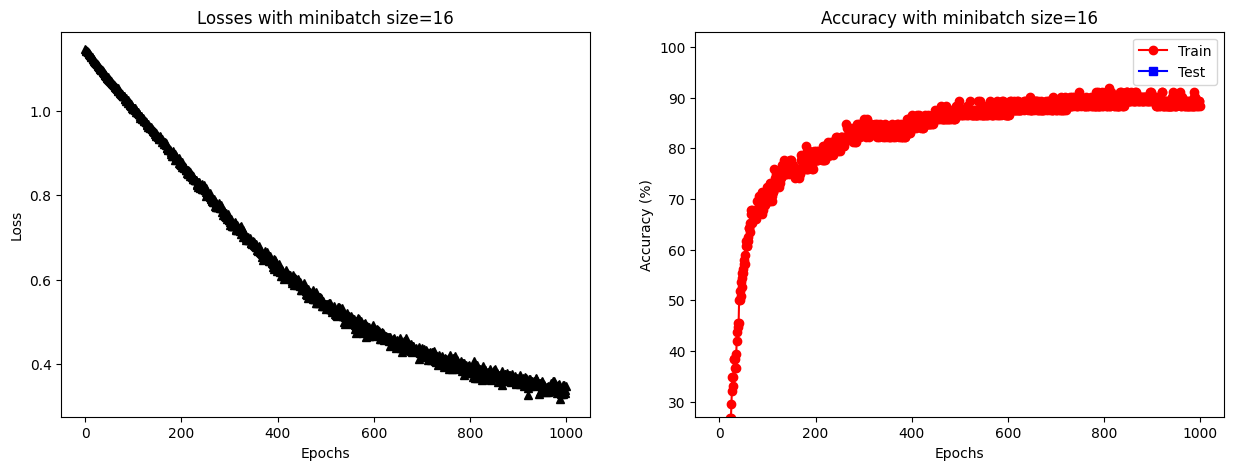

In [25]:
fig,ax = plt.subplots(1,2,figsize=(15,5))


ax[0].plot(losses,'k^-')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_title('Losses with minibatch size=' + str(batchSize))

ax[1].plot(trainAcc,'ro-')
ax[1].plot(testAcc,'bs-')
ax[1].set_title('Accuracy with minibatch size=' + str(batchSize))
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy (%)')
ax[1].legend(['Train','Test'])
ax[1].set_ylim([27,103])

plt.show()